In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [26]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Scientist']
top_skills = 5

In [4]:
df_exploded = df.explode('job_skills')
skill_count_by_job = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skill_count_by_job = skill_count_by_job.reset_index(name='skill_counts')
df_skill_count_by_job = df_skill_count_by_job.sort_values(by = 'skill_counts', ascending=False)
df_skill_count_by_job

,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


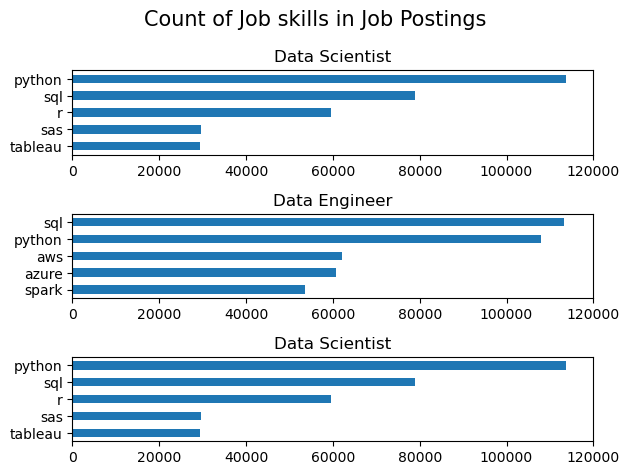

In [31]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_final = df_skill_count_by_job[df_skill_count_by_job['job_title_short'] == job_title].head(top_skills)
#   Creating a plot:
    df_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_counts', ax = ax[i], title = job_title)  # ax is explicitely identified

# Formatting: because there are multple plots => must clarify the index of the plot ( ax[i])
    ax[i].invert_yaxis()       # To invert the order of value to show biggest values  on the top
    ax[i].legend ().set_visible(False)   # no 'plt' in the code
    ax[i].set_ylabel('')                 # the code to change the x and ylabel is ax.set_ylabel() in this case
    ax[i].set_xlim(0, 120_000)


fig.suptitle('Count of Job skills in Job Postings', fontsize=15)
fig.tight_layout()